# **Data Prediction Example**

Hands-On Data Prediction example with **Linear Regression** for lecture 6.5, Knowledge Mining and Information Extraction IV

**Set Up Python**

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Get the Data**

In [4]:
#Prepare to read Data from Google Sheets
!pip install --upgrade -q gspread

#Authenticate with Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

#Read Google Spreadsheet as CSV into pandas DataFrame
import pandas as pd
goals = pd.read_csv('https://docs.google.com/spreadsheets/d/' + '1lBfpfTSMU1RZtAg8UcWpXFH-TOtPUgZVDt5-mHmhZsk' +
                   '/export?gid=1959724960&format=csv'
                  )
goals.head(10) 

,total_goals,height,weight,year,pos,bday
0,0,208.0,110.0,1987,goalkeeper,1987-02-09
1,0,205.0,97.0,1977,goalkeeper,1977-07-21
2,134,204.0,95.0,1977,forward,1977-03-20
3,56,204.0,85.0,1990,forward,1990-02-02
4,11,204.0,102.0,1987,defender,1987-01-28
5,0,204.0,87.0,1991,goalkeeper,1991-08-02
6,57,203.0,95.0,1983,forward,1983-10-28
7,51,203.0,87.0,1990,forward,1990-05-20
8,255,202.0,108.0,1973,forward,1973-03-30
9,232,202.0,95.0,1980,forward,1980-09-25


In [5]:
goals.describe()

,total_goals,height,weight,year
count,24484.000000,24484.000000,24484.000000,24484.000000
mean,34.717571,180.400302,75.029877,1978.552034
std,57.317872,6.772813,6.992918,16.599536
min,0.000000,134.000000,26.000000,1900.000000
25%,4.000000,176.000000,70.000000,1975.000000
50%,15.000000,180.000000,75.000000,1984.000000
75%,42.000000,185.000000,80.000000,1989.000000
max,1859.000000,208.000000,134.000000,2001.000000


Look for potential **correlations** in the data

In [6]:
corr_matrix = goals.corr()
corr_matrix["total_goals"].sort_values(ascending=False)

total_goals    1.000000
weight         0.002858
height        -0.071005
year          -0.242586
Name: total_goals, dtype: float64

In [7]:
corr_matrix["height"].sort_values(ascending=False)

height         1.000000
weight         0.774294
year           0.208216
total_goals   -0.071005
Name: height, dtype: float64

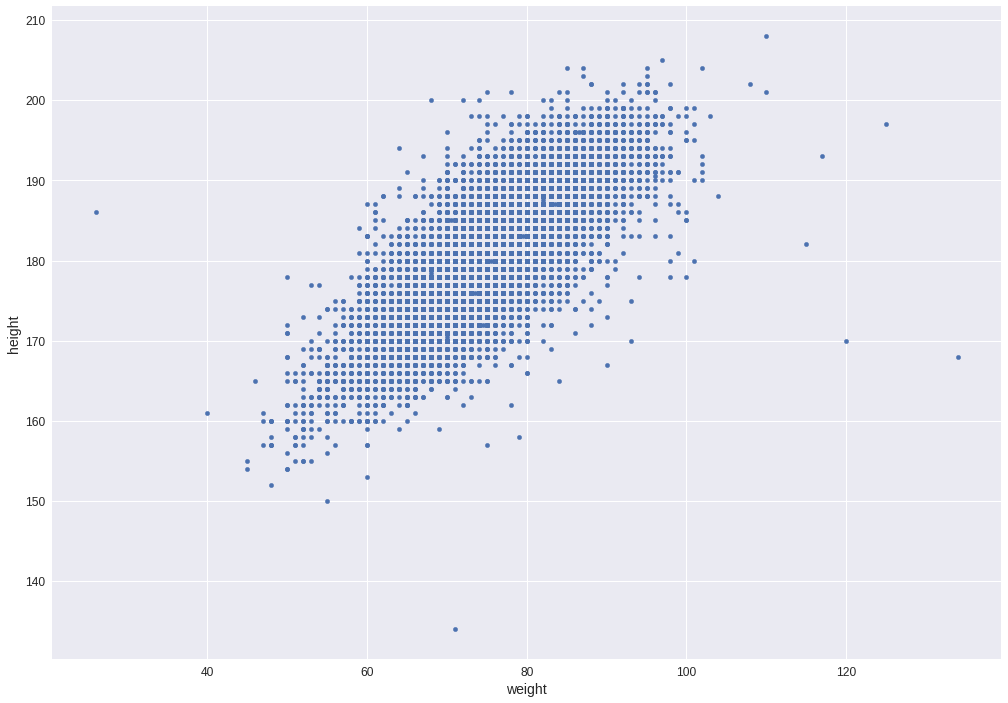

In [8]:
goals.plot(kind="scatter", x="weight", y="height", figsize=(17,12))

Now, let's try it with **Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit( goals["weight"].values.reshape(-1,1), goals["height"]) #linear regression task, predict height via weight
lin_reg.coef_ #show coefficients of linear regression

RMSE: 4.29


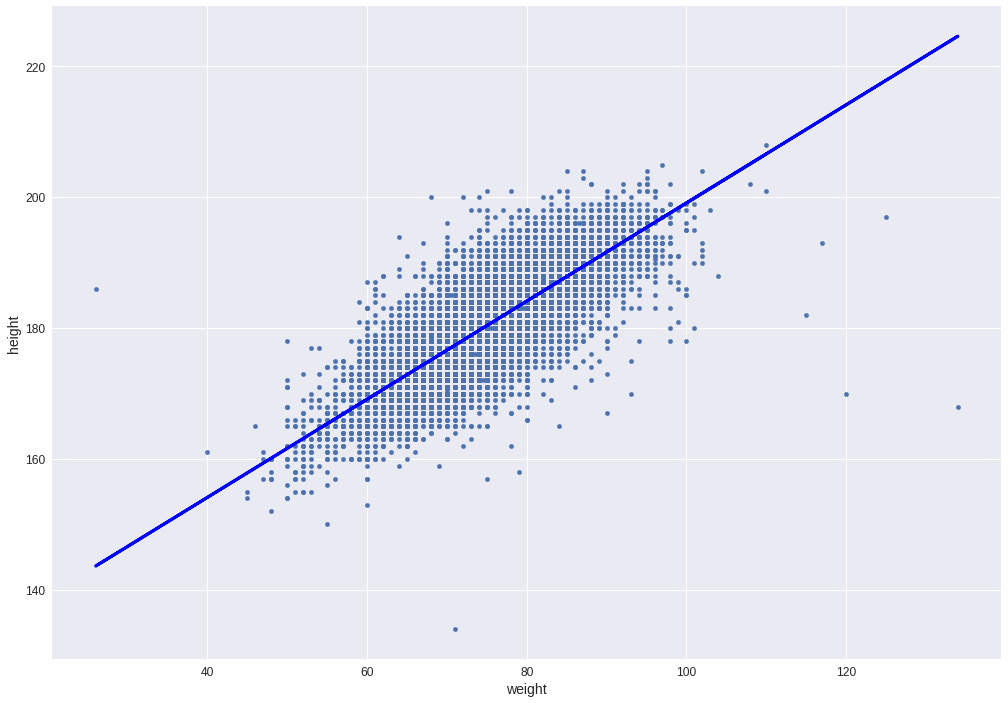

In [11]:
# predict
goals_height_pred = lin_reg.predict(goals["weight"].values.reshape(-1,1))  #predict height
# plot
goals.plot(kind="scatter", x="weight", y="height", figsize=(17,12))  #plot training data
plt.plot(goals["weight"].values.reshape(-1,1), goals_height_pred, color='blue', linewidth=3) #plot prediction
# mean squared error mse
lin_mse = mean_squared_error(goals["height"].values.reshape(-1,1), goals_height_pred)
# root mean squared error rmse
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)

Compare predictions with actual labels

In [12]:
print("Predictions:", goals_height_pred[:5])

Predictions: [206.62517854 196.87618828 195.37634362 187.87712034 200.62579991]


In [13]:
print("Labels:", list(goals["height"][:5]))

Labels: [208.0, 205.0, 204.0, 204.0, 204.0]


# However, let's try to **predict the total number of goals** from our (limited) data

RMSE: 55.60


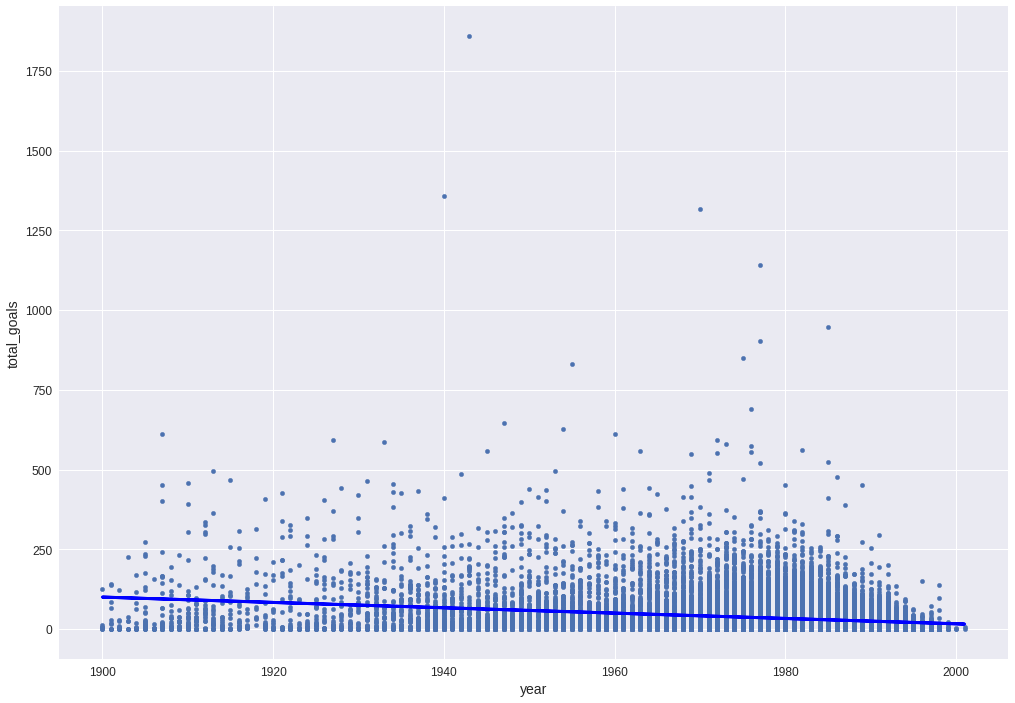

In [14]:
lin_reg = LinearRegression()
lin_reg.fit( goals["year"].values.reshape(-1,1), goals["total_goals"]) #predict total_goals by year
# predict
goals_goals_pred = lin_reg.predict(goals["year"].values.reshape(-1,1))
# plot
goals.plot(kind="scatter", x="year", y="total_goals", figsize=(17,12))
plt.plot(goals["year"].values.reshape(-1,1), goals_goals_pred, color='blue', linewidth=3)
# mse
lin_mse = mean_squared_error(goals["total_goals"].values.reshape(-1,1), goals_goals_pred)
# rmse
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)

**Next we try a non linear (polynomial) regression**

In [15]:
from sklearn.preprocessing import PolynomialFeatures
# polynomial regression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
goals.sort_values(by=['total_goals'])
goals_poly = poly_features.fit_transform(goals["year"].values.reshape(-1,1))
goals_poly[0]

array([1.987000e+03, 3.948169e+06])

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(goals_poly, goals["total_goals"])
goals_goal_pred = lin_reg.predict(goals_poly)
lin_reg.intercept_, lin_reg.coef_

(-77166.90752021699, array([ 7.95556852e+01, -2.04864857e-02]))

RMSE: 54.93


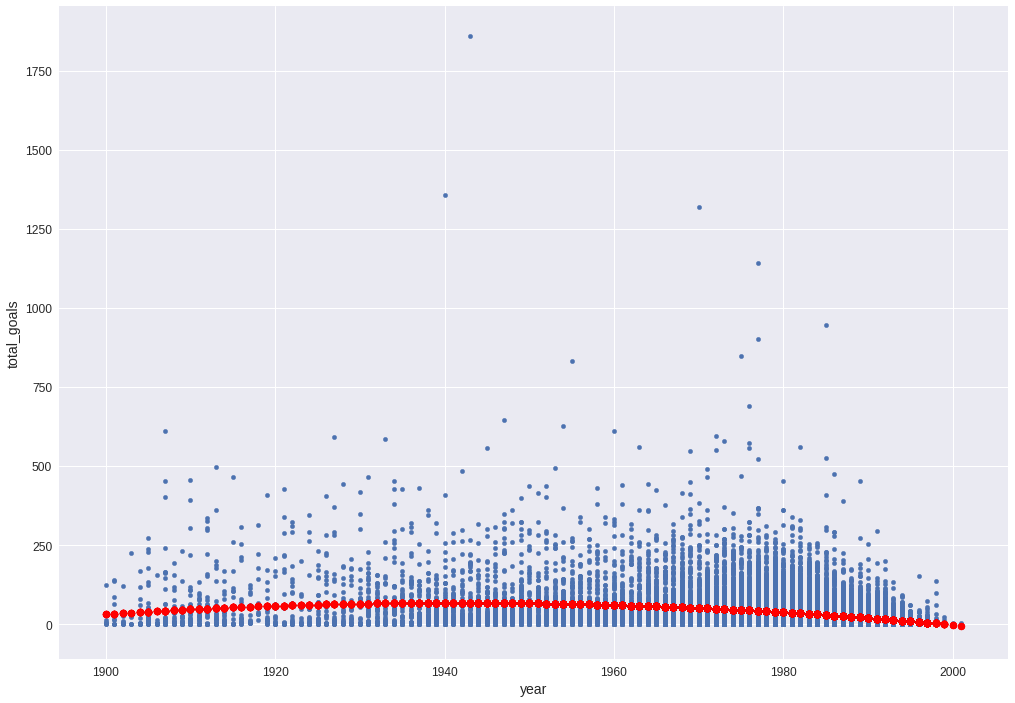

In [17]:
goals.plot(kind="scatter", x="year", y="total_goals", figsize=(17,12))
plt.scatter(goals["year"].values.reshape(-1,1), goals_goal_pred, color='red')
# mse
lin_mse = mean_squared_error(goals["total_goals"].values.reshape(-1,1), goals_goal_pred)
#rmse
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)

# Everything below is not part of the lecture anymore. 

However, you might use the pipeline for multivariate regression (below) and adapt it to your own prediction problems...

# **Looking a bit closer into our data**

First, let's look how the other columns are correlated with the price.

In [31]:
corr_matrix = goals.corr()
corr_matrix["total_goals"].sort_values(ascending=False)

total_goals    1.000000
weight         0.002858
height        -0.071005
year          -0.242586
Name: total_goals, dtype: float64

There are 2 non numeric columns: cut and clarity, which might also be strongly correlated with the price...

In [32]:
goals["pos"].value_counts()

midfielder              8524
defender                6225
forward                 5773
goalkeeper              2251
centre-back              696
fullback                 579
winger                   207
attacker                 196
wide midfielder           15
centre midfield            6
inside forward             5
playmaker                  4
defensive midfielder       3
Name: pos, dtype: int64

Convert non numeric values into numbers

In [33]:
goals_pos_encoded, goals_pos = goals["pos"].factorize()
goals_pos_encoded[:10]
goals_pos

Index([u'goalkeeper', u'forward', u'defender', u'centre-back', u'midfielder',
       u'fullback', u'attacker', u'winger', u'centre midfield',
       u'wide midfielder', u'defensive midfielder', u'inside forward',
       u'playmaker'],
      dtype='object')

Compose a new DataFrame with the numeric data

In [34]:
goals['pos_num']=goals_pos_encoded
goals.head(10)

,total_goals,height,weight,year,pos,bday,pos_num
0,0,208.0,110.0,1987,goalkeeper,1987-02-09,0
1,0,205.0,97.0,1977,goalkeeper,1977-07-21,0
2,134,204.0,95.0,1977,forward,1977-03-20,1
3,56,204.0,85.0,1990,forward,1990-02-02,1
4,11,204.0,102.0,1987,defender,1987-01-28,2
5,0,204.0,87.0,1991,goalkeeper,1991-08-02,0
6,57,203.0,95.0,1983,forward,1983-10-28,1
7,51,203.0,87.0,1990,forward,1990-05-20,1
8,255,202.0,108.0,1973,forward,1973-03-30,1
9,232,202.0,95.0,1980,forward,1980-09-25,1


Try to learn with multiple variables

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

goals_new = goals.filter(items=["weight", "height", "year", "pos_num"])

lin_reg = LinearRegression()
lin_reg.fit( goals_new, goals["total_goals"])

goals_goal_pred = lin_reg.predict(goals_new)

# mean squared error
lin_mse = mean_squared_error(goals["total_goals"].values.reshape(-1,1), goals_goal_pred)
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)


RMSE: 55.09


# **Multivariate Regression with normalized Features**

We install a complete pipeline for feature transformation:

(1) Categorial features to 1-Hot Encoding

(2) Scaling of numerical features

In [0]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler


num_attribs = ["weight","height","year"]
cat_attribs = ["pos"]

goals_labels = goals["total_goals"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [0]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [40]:
goals_prepared = full_pipeline.fit_transform(goals)
goals_prepared

array([[ 5.00089318,  4.07515472,  0.50893822, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.14183164,  3.63219827, -0.09350054, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.85582217,  3.48454612, -0.09350054, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.29131511, -2.27388774,  1.11137698, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43431984, -2.56919204,  0.99088923, ...,  0.        ,
         0.        ,  0.        ],
       [-3.00737191, -3.15980064,  0.50893822, ...,  0.        ,
         0.        ,  0.        ]])

In [41]:
goals_prepared.shape

(24484, 16)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(goals_prepared, goals_labels)
lin_reg.coef_

goals_goal_pred = lin_reg.predict(goals_prepared)

# The mean squared error
lin_mse = mean_squared_error(goals_labels, goals_goal_pred)
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)

RMSE: 49.95


In [43]:
some_data = goals.iloc[:5]
some_labels = goals_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [24.66830509 25.08827009 85.11935468 68.24380491 15.95145778]


In [44]:
print("Labels:", list(some_labels))

Labels: [0, 0, 134, 56, 11]


RMSE: 49.95


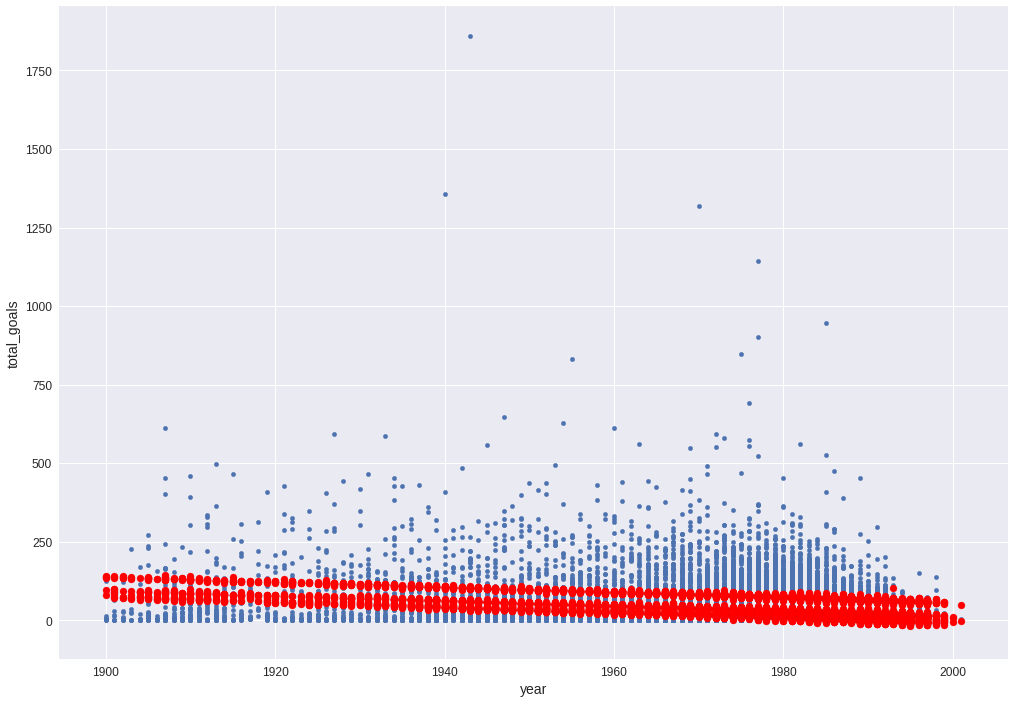

In [45]:
goals.plot(kind="scatter", x="year", y="total_goals", figsize=(17,12))
plt.scatter(goals["year"].values.reshape(-1,1), goals_goal_pred, color='red')
# The mean squared error
lin_mse = mean_squared_error(goals["total_goals"].values.reshape(-1,1), goals_goal_pred)
lin_rmse = np.sqrt(lin_mse)
print("RMSE: %.2f" %lin_rmse)